In [37]:
import tensorflow as tf

In [38]:
# Dataset com 60 mil figuras 28x28 de números
mnist = tf.keras.datasets.mnist

### Carregamento dos dados de treino e teste

O exemplo atual trata-se de um sistema de treinamento supervisionado, ou seja, os dados de entrada e saída são rotulados.

Para as variáveis definidas, segue a explicação:
* x_train - Dados de treinamento de entrada
* y_train - Dados de treinamento de saída
* x_test - Dados de teste de entrada
* y_test - Dados de teste de saída

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Normalização dos dados

No exemplo atual, as figuras estão definidas em escala de cinza no intervalo de 0-255. Na normalzação dos dados, será transformada essa escala em uma escala de 0-1

In [40]:
x_test, x_test = x_train / 255.0, x_test / 255.0

### Criar uma rede neural

#### Estrutura do Modelo
``` python
model = tf.keras.models.Sequential([...])
```
Este é um modelo sequencial do Keras, onde as camadas são empilhadas uma após a outra.
#### Camadas do Modelo:
1. **Camada Flatten**:
``` python
tf.keras.layers.Flatten(input_shape=(28, 28))
```
- Transforma a entrada 2D (28x28) em um vetor unidimensional
- Geralmente usada para imagens do MNIST (dígitos escritos à mão)

1. **Primeira Camada Densa**:
``` python
tf.keras.layers.Dense(128, activation=tf.nn.relu)
```
- 128 neurônios
- Função de ativação ReLU (Rectified Linear Unit)
- Processa os dados da camada anterior

1. **Camada Dropout**:
``` python
tf.keras.layers.Dropout(0.2)
```
- Previne overfitting
- Desativa aleatoriamente 20% dos neurônios durante o treinamento

1. **Camada de Saída**:
``` python
tf.keras.layers.Dense(10, activation=tf.nn.softmax)
```
- 10 neurônios (um para cada dígito de 0-9)
- Softmax para classificação multiclasse
- Retorna probabilidades para cada dígito

#### Uso Típico
Este modelo é comumente usado para classificação de dígitos manuscritos do conjunto de dados MNIST, onde:
- Entrada: imagens 28x28 pixels
- Saída: probabilidades para cada dígito (0-9)


In [41]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Definir algoritmo de treinamento, função de perda e a métrica de treinamento

Esta linha de código está configurando um modelo de rede neural usando o método `compile()`. Vamos quebrar cada componente:
1. **`optimizer='adam'`**:
    - O Adam é um algoritmo de otimização popular
    - Ele ajusta automaticamente a taxa de aprendizado durante o treinamento
    - É uma escolha muito comum por combinar as vantagens de outros otimizadores

2. **`loss='SparseCategoricalCrossentropy'`**:
    - Esta é a função de perda (loss function) que mede o erro do modelo
    - É especialmente útil para problemas de classificação multiclasse
    - "Sparse" significa que as classes alvo são fornecidas como números inteiros
    - É comumente usado quando suas classes são mutuamente exclusivas

3. **`metrics=['accuracy']`**:
    - Define quais métricas serão monitoradas durante o treinamento
    - 'accuracy' mede a porcentagem de previsões corretas
    - Você verá esta métrica sendo reportada durante o treinamento

Este código é típicamente usado antes de treinar o modelo, preparando-o com:
- Como ele deve otimizar os pesos (optimizer)
- Como medir o erro (loss)
- Como avaliar o desempenho (metrics)

É uma etapa essencial antes de chamar `model.fit()` para iniciar o treinamento.


In [42]:
model.compile(optimizer='adam',
              loss='SparseCategoricalCrossentropy',
              metrics=['accuracy'])

### Treinar a rede neural

Este é um código fundamental no TensorFlow/Keras para treinar um modelo de aprendizado de máquina. Vamos detalhar cada parte:
1. `model`: Este é um objeto que representa o seu modelo de rede neural criado anteriormente.
2. `.fit()`: Este é o método que inicia o treinamento do modelo. A palavra "fit" em inglês significa "ajustar", que é exatamente o que está acontecendo - o modelo está se ajustando aos dados.
3. Parâmetros:
    - : São os dados de entrada para treinamento `x_train`
    - : São os rótulos/respostas corretas correspondentes `y_train`
    - : Define que o modelo vai treinar por 5 épocas completas `epochs=5`

Uma **época** representa uma passagem completa por todos os dados de treinamento. Neste caso, o modelo vai passar pelos dados 5 vezes, ajustando seus pesos e vieses em cada passagem para melhorar sua precisão.
Durante o treinamento, você verá na tela:
- A barra de progresso para cada época
- A perda (loss) do modelo
- Outras métricas que você tenha definido (como precisão/accuracy)


In [43]:
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7115 - loss: 7.0115
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8489 - loss: 0.5790
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8773 - loss: 0.4619
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8872 - loss: 0.4173
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8960 - loss: 0.3854
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9026 - loss: 0.3775
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9064 - loss: 0.3485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9134 - loss: 0.3334
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9138 - loss: 0.3260
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9143 - loss: 0.3288


### Avaliar a acurácia da rede no conjunto de teste

O método `model.evaluate()` é uma função importante do TensorFlow/Keras que é usada para avaliar o desempenho de um modelo treinado em um conjunto de dados de teste. Vamos detalhar cada parte:
**Parâmetros:**
- : São os dados de entrada para teste `x_test`
- : São os rótulos/resultados esperados correspondentes `y_test`
- : Define o nível de detalhamento das informações exibidas durante a avaliação
    - `0`: silencioso
    - `1`: barra de progresso
    - : uma linha por época `2`

`verbose=2`

**O que ele faz:**
1. Calcula as métricas de desempenho do modelo usando o conjunto de dados de teste
2. Retorna uma lista com os valores das métricas definidas durante a compilação do modelo, tipicamente:
    - Loss (perda)
    - Accuracy (precisão)
    - Outras métricas personalizadas (se definidas)


In [44]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - 6ms/step - accuracy: 0.0974 - loss: 2.5029


[2.502943992614746, 0.09740000218153]

In [45]:
import matplotlib.pyplot as plt

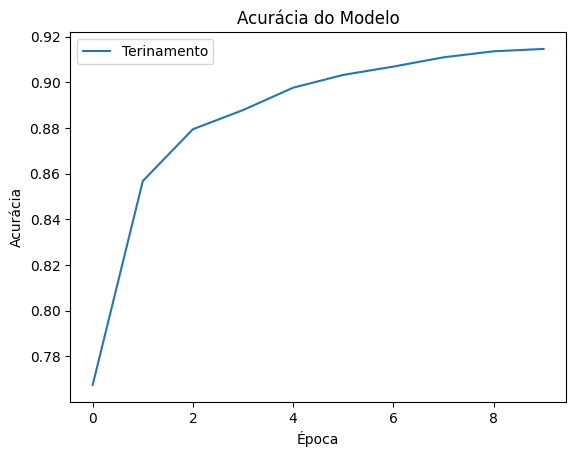

In [46]:
plt.plot(history.history['accuracy'])
plt.title('Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Terinamento'], loc='upper left')
plt.show()

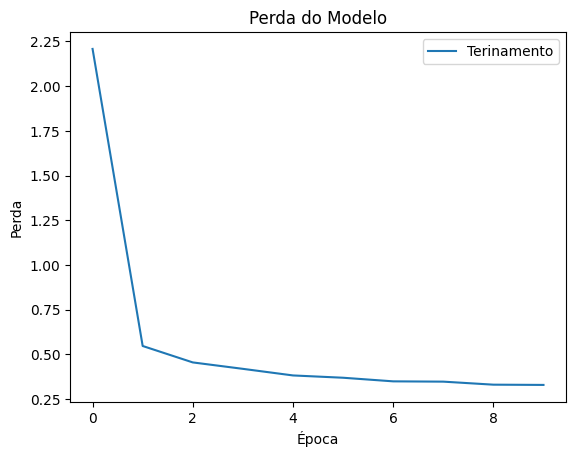

In [47]:
plt.plot(history.history['loss'])
plt.title('Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Terinamento'], loc='upper right')
plt.show()